<a href="https://colab.research.google.com/github/feniltailor22/Deep_Learning/blob/main/Transfer_Learning_Yoga_poses_classification_using_Inception_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob

In [2]:
#Steps to load a dataset from kaggle

In [ ]:
#1. Install the Kaggle library

! pip install kaggle

In [11]:
#2. Make a directory named “.kaggle”

! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [12]:
#3. Copy the kaggle.json” into this new directory

! cp kaggle.json ~/.kaggle/

In [13]:
#4. Allocate the required permission for this file.

! chmod 600 ~/.kaggle/yoga.json

In [14]:
#Downloading Competitions dataset:
# Copy API Command 

! kaggle datasets download -d shrutisaxena/yoga-pose-image-classification-dataset

100% 0.98G/0.98G [00:33<00:00, 61.3MB/s]
100% 0.98G/0.98G [00:33<00:00, 31.4MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

In [ ]:
#Train-Test Split using ImageDataGenerator 

In [18]:
train_datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [22]:
train_dataset= train_datagen.flow_from_directory(
    directory='/content/dataset/',
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

Found 4835 images belonging to 107 classes.


In [24]:
validation_dataset= train_datagen.flow_from_directory(
    directory='/content/dataset/',
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 1156 images belonging to 107 classes.


In [25]:
#re-size all the images to 224*224 because Inception V3 has 224*224 input layer architecture
IMAGE_SIZE = [224, 224]

In [26]:
#add preprocessing layer to the front of  Inception V3 library

In [27]:
inception= InceptionV3(input_shape=IMAGE_SIZE+ [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [30]:
# don't train existing weights of Inception V3 because it is already trained weights.
for layer in inception.layers:
  layer.trainable = False

In [31]:
#getting the number of classes available in Training Data
folders= glob('/content/dataset/*')

In [32]:
folders

['/content/dataset/urdhva dhanurasana',
 '/content/dataset/bhujapidasana',
 '/content/dataset/durvasasana',
 '/content/dataset/dandasana',
 '/content/dataset/yoganidrasana',
 '/content/dataset/marichyasana i',
 '/content/dataset/salamba sarvangasana',
 '/content/dataset/hanumanasana',
 '/content/dataset/adho mukha vriksasana',
 '/content/dataset/ardha chandrasana',
 '/content/dataset/virasana',
 '/content/dataset/parsva bakasana',
 '/content/dataset/eka pada koundinyanasana i',
 '/content/dataset/salamba sirsasana',
 '/content/dataset/agnistambhasana',
 '/content/dataset/virabhadrasana ii',
 '/content/dataset/urdhva hastasana',
 '/content/dataset/bharadvajasana i',
 '/content/dataset/virabhadrasana i',
 '/content/dataset/paschimottanasana',
 '/content/dataset/utthita hasta padangustasana',
 '/content/dataset/tolasana',
 '/content/dataset/bhairavasana',
 '/content/dataset/marichyasana iii',
 '/content/dataset/astavakrasana',
 '/content/dataset/ganda bherundasana',
 '/content/dataset/sal

In [33]:
len(folders)

107

In [34]:
#Flattening the last layer of Inception V3
x = Flatten()(inception.output)

In [35]:
#Creating the last output layer (which is dense) = len(folders) = 107 here.
predictions= Dense(len(folders), activation='softmax')(x)

In [36]:
#creating a model
model= Model(inputs=inception.input, outputs=predictions)

In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [38]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
earlystop= EarlyStopping(monitor='val_loss', patience=5)

In [43]:
#fit the model
results= model.fit(
    x=train_dataset, 
    validation_data=validation_dataset, 
    batch_size=16,
    epochs=10,
    verbose=True,
    callbacks=earlystop,
    shuffle=True
    )

Epoch 1/10
 63/303 [=====>........................] - ETA: 1:10 - loss: 7.5040 - accuracy: 0.7520

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


303/303 [==============================] - 111s 365ms/step - loss: 7.7314 - accuracy: 0.7502 - val_loss: 35.2440 - val_accuracy: 0.3728
Epoch 2/10
303/303 [==============================] - 111s 366ms/step - loss: 7.3629 - accuracy: 0.7713 - val_loss: 35.1287 - val_accuracy: 0.4014
Epoch 3/10
303/303 [==============================] - 110s 364ms/step - loss: 6.9579 - accuracy: 0.7971 - val_loss: 34.9317 - val_accuracy: 0.4135
Epoch 4/10
303/303 [==============================] - 110s 365ms/step - loss: 6.8699 - accuracy: 0.8066 - val_loss: 39.5617 - val_accuracy: 0.4014
Epoch 5/10
303/303 [==============================] - 111s 368ms/step - loss: 6.4578 - accuracy: 0.8254 - val_loss: 37.2009 - val_accuracy: 0.4135


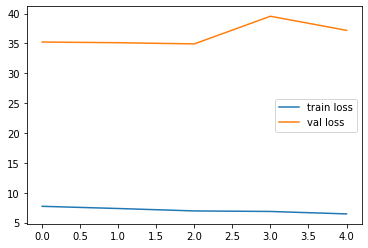

In [44]:
# loss
plt.plot(results.history['loss'], label='train loss')
plt.plot(results.history['val_loss'], label='val loss')
plt.legend()
plt.show()

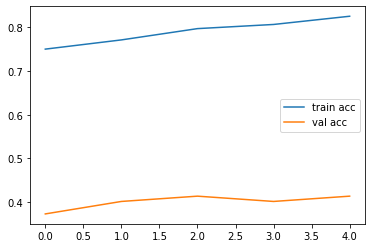

In [45]:
# accuracies
plt.plot(results.history['accuracy'], label='train acc')
plt.plot(results.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [46]:
y_pred = model.predict(validation_dataset)

In [47]:
y_pred

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.99264658e-29, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.58238650e-18, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.05097621e-34, 1.04471096e-22, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)

In [48]:
y_pred = np.argmax(y_pred, axis=1)

In [49]:
y_pred

array([ 95,  44, 102, ...,  44,  14,  71])